# Pacific Section: Triple Decomp Analysis

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.colors as colors
from xhistogram.xarray import histogram
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw
import scipy.ndimage as filter

In [2]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import filt_funcs as ff

# Load Data

In [3]:
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-175)_lat:(-70,70)_ds_z.nc')

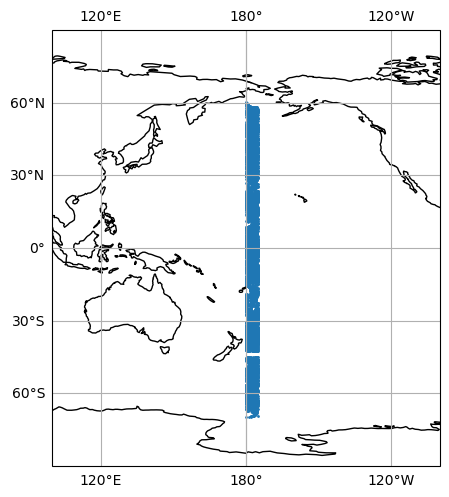

In [29]:
fig = plt.figure(figsize=(5, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_global()
ax.set_extent([100, -100, -90, 90])
ax.gridlines(draw_labels=True)

ax.scatter(ds.LONGITUDE,ds.LATITUDE,transform=ccrs.PlateCarree(),color='tab:blue',s=1)

In [5]:
x='LATITUDE'
y='PRES_INTERPOLATED'
sample_max = 2.5

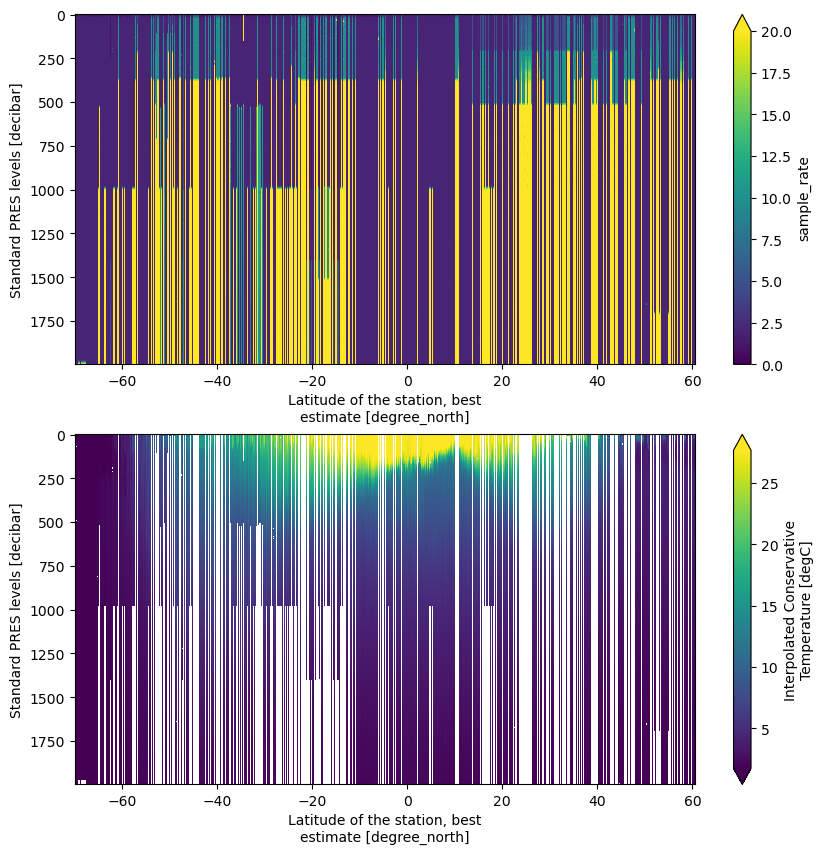

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(211)
ds.sortby(x).sample_rate.plot(x=x,y=y,vmin=0,vmax=20)
plt.gca().invert_yaxis()

plt.subplot(212)
ds.sortby(x).CT.where(ds.sample_rate<sample_max).plot(x=x,y=y,robust=True)
plt.gca().invert_yaxis()

# Calculate Terms